In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Q1

In [2]:
def get_column(data, index):
  result = []
  for row in data:
    result.append(row[index])
  return result

In [3]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv ( index =0)
  tv_data = get_column(data, 0)

  # get radio ( index =1)
  radio_data = get_column(data, 1)

  # get newspaper ( index =2)
  newspaper_data = get_column(data, 2)

  # get sales ( index =3)
  sales_data = get_column(data, 3)

  # building X input and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X, y

In [4]:
X , y = prepare_data ('/content/drive/MyDrive/Project/AIO/advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


# Q2.2

In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

In [6]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print(y)

1.0


# Q2.3.

In [7]:
def compute_loss(y_hat,y):
  return (y_hat - y) ** 2

In [8]:
l = compute_loss ( y_hat =1 , y =0.5)
print ( l )

0.25


# Q2.4

In [9]:
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2 * (y_hat - y) * xi
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2 * (y_hat - y)
  return dl_db

In [10]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [11]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


# Q2.5

In [12]:
def update_weight_wi(wi,dl_dwi,lr):
  wi = wi - lr * dl_dwi
  return wi

def update_weight_b(b,dl_db,lr):
  b = b - lr * dl_db
  return b

In [13]:
after_wi = update_weight_wi (wi =1.0, dl_dwi = -0.5 , lr=1e-5)
print ( after_wi )

1.000005


In [14]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )
print ( after_wi )

0.50001
1.000005


# Q2.6

In [15]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b

In [16]:
def implement_linear_regression(X, y, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y)
  for epoch in range(epoch_max):
    for i in range(N):
      # Get a sample
      x1 = X[0][i]
      x2 = X[1][i]
      x3 = X[2][i]

      y_true = y[i]

      # Compute output
      y_hat = x1 * w1 + x2 * w2 + x3 * w3 + b

      # Compute loss
      loss = compute_loss(y_hat, y_true)

      # Compute gradient
      dl_dw1 = compute_gradient_wi(x1, y_true, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y_true, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y_true, y_hat)
      dl_db = compute_gradient_b(y_true, y_hat)

      # Update weights
      w1 = update_weight_wi(w1, dl_dw1,lr)
      w2 = update_weight_wi(w2, dl_dw2,lr)
      w3 = update_weight_wi(w3, dl_dw3,lr)
      b = update_weight_b(b, dl_db,lr)

      losses.append(loss)

  return w1, w2, w3, b, losses

In [28]:
X, y = prepare_data('/content/drive/MyDrive/Project/AIO/advertising.csv')
w1 , w2 , w3 ,b , losses = implement_linear_regression (X , y )
print ( w1 , w2 , w3 )

0.07405965645766091 0.15917312788690222 0.017560984002884375


[406.15267237747656, 16.259526239251144, 52.47065180648837, 10.484320947079752, 4.313855192264873, 7.749292056780032, 22.925747566506093, 0.28986496723249866, 14.845791161086796, 24.56319804192521, 40.2953155259123, 4.958906118918003, 13.585278696260476, 29.17269704752309, 6.334819092811701, 9.277916159623091, 0.03797830999766242, 26.817750840842518, 31.76980565094277, 7.359517349259244, 4.958080161990763, 0.056389385183729296, 4.649008073856385, 8.311433400517428, 10.76526229159331, 47.19655059505302, 37.57423142172328, 7.909292888795469, 13.070519430188961, 12.934324702240577, 3.756057879028512, 8.95923363499359, 29.988853158285544, 11.21671751228161, 35.96012756649177, 7.661913196076202, 88.27382064336182, 5.457787974602096, 5.356709560938635, 47.1187255155196, 2.581963964688902, 1.4477877166876516, 6.71027275244334, 15.064551274508885, 10.022031365962338, 0.040923573563825366, 1.7106456932613263, 1.7443648324251788, 9.772735182428212, 5.922619890842567, 0.23409098447515614, 7.80373

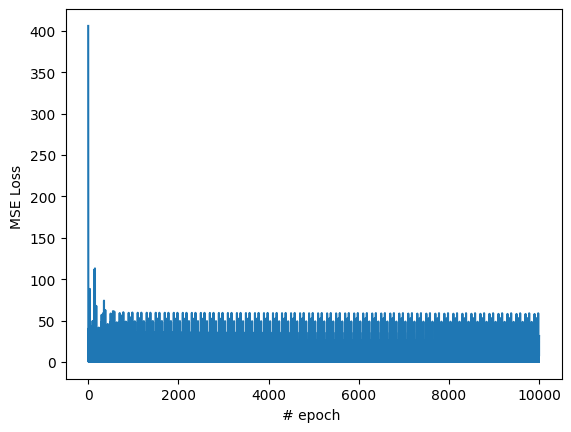

In [29]:
print ( losses )
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

# Q9

In [18]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('/content/drive/MyDrive/Project/AIO/advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176429641724388


# Q2.7

In [19]:
def compute_loss_mae(y_hat,y):
  return (y_hat - y)

In [20]:
l = compute_loss_mae( y_hat =1 , y =0.5)
print ( l )

0.5


# Q3

In [30]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0

    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y_true = y_data[i]

      #compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      #compute loss
      loss = compute_loss(y_hat, y_true)

      #compute gradient
      dl_dw1 = compute_gradient_wi(x1, y_true, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y_true, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y_true, y_hat)
      dl_db = compute_gradient_b(y_true, y_hat)

      #accumulate loss & gradient
      loss_total += loss
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db

    #update parameter
    w1 = update_weight_wi(w1, dw1_total/N, lr)
    w2 = update_weight_wi(w2, dw2_total/N, lr)
    w3 = update_weight_wi(w3, dw3_total/N, lr)
    b = update_weight_b(b, db_total/N, lr)


    losses.append(loss_total/N)

  return w1, w2, w3, b, losses



[246.20915960194247, 49.1710296605087, 17.953851346871133, 12.903765034762154, 11.985953281135767, 11.723632871165242, 11.568126206857997, 11.432758018289007, 11.3037514224325, 11.17883467559023, 11.057554395764068, 10.93974707814754, 10.825297835958184, 10.714102243707273, 10.60606022899739, 10.501075023729452, 10.399052916266426, 10.299903132566854, 10.203537740180144, 10.10987155828236, 10.018822071021791, 9.930309343669395, 9.844255941422244, 9.760586850766554, 9.67922940331801, 9.600113202061095, 9.523170049911807, 9.448333880530484, 9.37554069131397, 9.304728478498232, 9.235837174305193, 9.168808586069195, 9.103586337280687, 9.040115810486933, 8.97834409199095, 8.918219918292275, 8.859693624214488, 8.802717092666468, 8.747243705985811, 8.6932282988146, 8.640627112459319, 8.589397750687988, 8.539499136919359, 8.490891472760282, 8.443536197848745, 8.397395950961483, 8.352434532346237, 8.308616867240199, 8.265908970537154, 8.224277912567164]


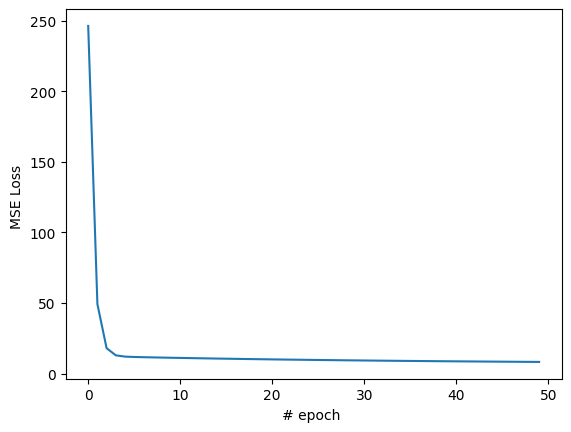

In [31]:
X , y = prepare_data ('/content/drive/MyDrive/Project/AIO/advertising.csv')
w1 , w2 , w3 ,b , losses = implement_linear_regression_nsamples (X , y ,
epoch_max =50 ,
lr =1e-5)
print ( losses )
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

In [32]:
print(w1,w2,w3)

0.07629415273230898 0.0675893535666178 0.04178369536040213


# Q4

In [24]:
X , y = prepare_data ('/content/drive/MyDrive/Project/AIO/advertising.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e -5)
# Print loss value at iteration 9999
print ( L [9999])

SyntaxError: invalid decimal literal (<ipython-input-24-8924ec568055>, line 2)